#  Apriori algorithm
* for Recommendation System

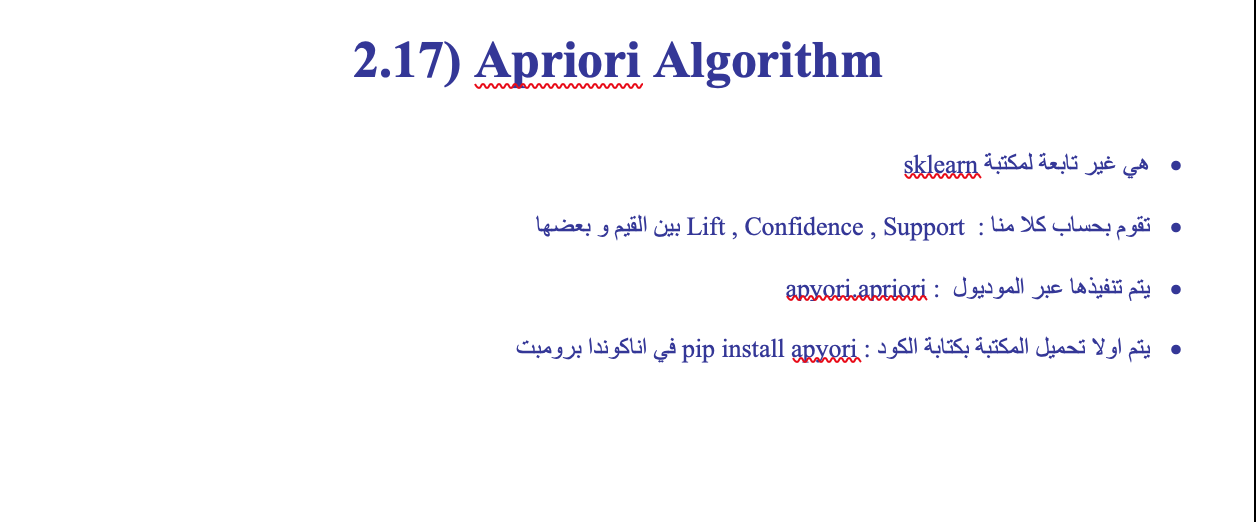

In [2]:
from IPython.display import Image
Image(filename='1.png')

In [3]:
from apyori import apriori
import pandas as pd

In [6]:
store_data = pd.read_csv('store_data.csv', header=None)  

store_data.head()  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
store_data.shape

(7501, 20)

In [15]:
records = []  
for i in range(0, 7501):  
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])
records

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [9]:
len(records)

7501

In [10]:
len(records[1])

20

In [22]:
association_results = list(apriori(records, min_support=0.0045, min_confidence=0.2, 
                            in_lift=3, min_length=2))

print(len(association_results ))  


1289


In [23]:
print(association_results [0])  


RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)])


In [26]:
print(association_results [11])  


RelationRecord(items=frozenset({'asparagus', 'nan'}), support=0.004666044527396347, ordered_statistics=[OrderedStatistic(items_base=frozenset({'asparagus'}), items_add=frozenset({'nan'}), confidence=1.0, lift=1.0001333333333333)])


In [27]:
# for clearing the association
for item in association_results :

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    if len(items)>=2 :
         print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")



Support: 0.23836821757099053
Confidence: 0.23836821757099053
Lift: 1.0
Support: 0.9998666844420744
Confidence: 0.9998666844420744
Lift: 1.0
Rule: burgers -> almonds
Support: 0.005199306759098787
Confidence: 0.25490196078431376
Lift: 2.923577382023146
Rule: chocolate -> almonds
Support: 0.005999200106652446
Confidence: 0.29411764705882354
Lift: 1.7950988369310295
Rule: eggs -> almonds
Support: 0.006532462338354886
Confidence: 0.3202614379084967
Lift: 1.7821076007059597
Rule: green tea -> almonds
Support: 0.005065991201173177
Confidence: 0.24836601307189543
Lift: 1.879912678155689
Rule: milk -> almonds
Support: 0.005199306759098787
Confidence: 0.25490196078431376
Lift: 1.9670983619785367
Rule: mineral water -> almonds
Support: 0.007598986801759766
Confidence: 0.37254901960784315
Lift: 1.5629139799096374
Rule: nan -> almonds
Support: 0.020263964804692707
Confidence: 0.9934640522875817
Lift: 0.9935965141612201
Rule: spaghetti -> almonds
Support: 0.005999200106652446
Confidence: 0.294117647

Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> mineral water
Support: 0.006399146780429276
Confidence: 0.5454545454545454
Lift: 2.2882855399633923
Rule: cooking oil -> eggs
Support: 0.011731769097453673
Confidence: 0.2297650130548303
Lift: 1.2785366193800312
Rule: escalope -> cooking oil
Support: 0.005332622317024397
Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> nan
Support: 0.007865617917610986
Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> nan
Support: 0.004799360085321957
Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> nan
Support: 0.006799093454206106
Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> grated cheese
Support: 0.005732568990801226
Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> nan
Support: 0.007065724570057326
Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> nan
Support: 0.008398880149313425
Confidence: 1.0
Lift: 1.0001333333333333
Rule: cooking oil -> spaghetti
Support:

Support: 0.005732568990801226
Confidence: 0.4215686274509804
Lift: 1.769550237554451
Rule: nan -> chocolate
Support: 0.008398880149313425
Confidence: 0.2530120481927711
Lift: 1.4803770464071577
Rule: chocolate -> eggs
Support: 0.005732568990801226
Confidence: 0.25
Lift: 1.3911350148367951
Rule: chocolate -> eggs
Support: 0.005465937874950006
Confidence: 0.23295454545454544
Lift: 1.296284900188832
Rule: chocolate -> eggs
Support: 0.006532462338354886
Confidence: 0.2832369942196532
Lift: 1.5760836006243462
Rule: milk -> chocolate
Support: 0.009198773496867084
Confidence: 0.27710843373493976
Lift: 2.138467450047102
Rule: mineral water -> chocolate
Support: 0.013464871350486601
Confidence: 0.40562248995983935
Lift: 1.7026157231050671
Rule: mineral water -> chocolate
Support: 0.004532728969470737
Confidence: 0.3366336633663366
Lift: 1.9334526101921063
Rule: chocolate -> eggs
Support: 0.005599253432875617
Confidence: 0.28187919463087246
Lift: 1.5685280704200106
Rule: spaghetti -> chocolate
S